In [2]:
import matplotlib.pyplot as  plt
import numpy as np
import math

In [3]:


# 定义四个点的坐标
t = np.linspace(0,5,4)
print(t)
x_cd = t
y_cd = np.sin(t)

def draw_rec(x_cd,y_cd):
    x_cd = list(x_cd)
    y_cd = list(y_cd)
    # 确保第一个点重复出现以闭合矩
    x_cd.append(x_cd[0])
    y_cd.append(y_cd[0])
    plt.plot(x_cd, y_cd, color='b', lw=2)  # 画矩形
    plt.scatter(x_cd, y_cd, color='r')  # 标记所有顶点
    plt.title('Rectangle with Given Four Points')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')




[0.         1.66666667 3.33333333 5.        ]


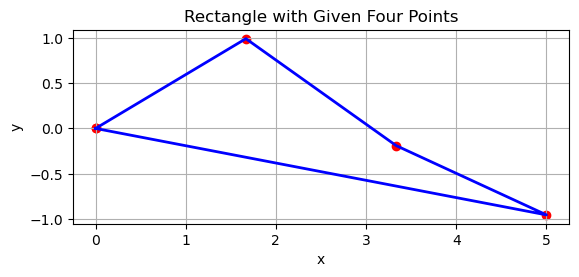

In [4]:
draw_rec(x_cd,y_cd)

In [5]:
#定义theta到直角坐标的函数
def fuc_x(theta,p=170):#确定螺距
    return p*theta*math.cos(theta)/(2*np.pi)
def fuc_y(theta,p=170):
    return p*theta*math.sin(theta)/(2*np.pi)

In [6]:
def distance(dot1,dot2):
    return math.sqrt((dot1[0]-dot2[0])**2+(dot1[1]-dot2[1])**2)
distance((0,0),(1,1))

1.4142135623730951

In [7]:
#因为eqution定义有限制，所以使用全局变量
theta = 0
d = 286
eq = lambda t:distance((fuc_x(theta),fuc_y(theta)),(fuc_x(t),fuc_y(t)))-d
def distance_equation(vars):
    theta_1 = vars
    eq = distance((fuc_x(theta),fuc_y(theta)),(fuc_x(theta_1),fuc_y(theta_1)))-d
    return eq


In [22]:
from scipy.optimize import fsolve
def theta_seq(num_bench,theta0,distance):
    global d
    d = distance
    seq = []
    seq.append(theta0)
    for _ in range(num_bench):
        global theta
        theta = seq[-1]
        next_theta = fsolve(distance_equation,theta+1e-2).item()
        seq.append(next_theta)
    return seq

In [23]:
d_head = 341-27.5*2#龙头长度
seq1 = theta_seq(num_bench=1,theta0=0,distance=d_head)
seq1

[0, 10.570535281490365]

In [25]:
d_bench = 220-27.5*2
seq2 = theta_seq(num_bench=222,theta0=seq1[-1],distance=d_bench)


In [31]:
seq = seq1[:1]+seq2
len(seq)

224

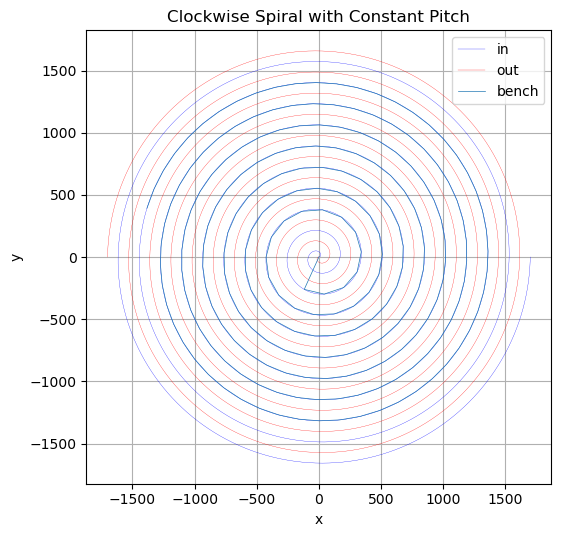

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the spiral
num_turns = 5    # Number of turns in the spiral
theta_max = 2 * np.pi * num_turns  # Angle for the number of turns
pitch = 170        # Distance between consecutive loops

# Generate points for the spiral
theta = np.linspace(0, theta_max*2, 100000)
r = pitch * theta / (2 * np.pi)

# Convert polar coordinates (r, theta) to Cartesian coordinates (x, y)
x = r * np.cos(theta)
y = r * np.sin(theta)
r_cirle = 60
circle_x = r_cirle*np.cos(theta)
circle_y = r_cirle*np.sin(theta)

# Plotting the spiral
plt.figure(figsize=(6, 6))
plt.plot(x, y, color='b', lw=0.2,label = 'in')
plt.plot(-x,-y,color='r',lw=0.2,label='out')
plt.plot([fuc_x(t) for t in seq][:],[fuc_y(t) for t in seq][:],lw=0.5,label='bench')
#plt.plot(circle_x,circle_y,color='y',label='turning zone')
plt.legend()
plt.title('Clockwise Spiral with Constant Pitch')
plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_aspect('equal', adjustable='box')  # Ensure equal aspect ratio
plt.grid(True)
plt.show()
